In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [154]:
dfx = pd.read_csv('wef_2014_2015.csv',sep=",",header=None)

In this step we filter the rows in order to have columns with the pattern 1.01 in order to set them as column headers

In [155]:
valid=["Value"]
validCols=dfx[dfx.isin(valid)].dropna(how='all',axis=1).columns.values.tolist()
dfy=dfx.loc[:,validCols]
pattern=r'[0-9].[0-9]'
validCols=dfy[pd.DataFrame((dfy.loc[1,:]).str.contains(pattern)).transpose()].dropna(how='all',axis=1).columns.values.tolist()
basicCols=[0,1]
basicCols.extend(validCols)
df=dfx[basicCols].drop(dfy.index[[0,2]]).rename(columns=dfx.iloc[1].map(str.strip)).drop(dfy.index[1]).reset_index().drop('index',1)
df.head(5)

,Country,Name,"1.01 Property rights, 1-7 (best)","1.02 Intellectual property protection, 1-7 (best)","1.03 Diversion of public funds, 1-7 (best)","1.04 Public trust in politicians, 1-7 (best)","1.05 Irregular payments and bribes, 1-7 (best)","1.06 Judicial independence, 1-7 (best)","1.07 Favoritism in decisions of government officials, 1-7 (best)","1.08 Wastefulness of government spending, 1-7 (best)",...,"11.06 Control of international distribution, 1-7 (best)","11.08 Extent of marketing, 1-7 (best)","11.05 Value chain breadth, 1-7 (best)","12.01 Capacity for innovation, 1-7 (best)","12.02 Quality of scientific research institutions, 1-7 (best)","12.03 Company spending on R&D, 1-7 (best)","12.04 University-industry collaboration in R&D, 1-7 (best)","12.05 Gov’t procurement of advanced tech products, 1-7 (best)","12.06 Availability of scientists and engineers, 1-7 (best)","12.07 PCT patents, applications/million pop.*"
0,ALB,Albania,3.0483970675,3.2145004894,3.2197790429,2.5615939877,3.7359721026,2.6354204428,3.3630807486,3.2821955775,...,3.3817044166,4.0860253711,2.8289337475,3.5797459524,2.2811480384,2.8535667253,2.3393567634,3.829768256,3.2388779869,0.1775568182
1,DZA,Algeria,3.7481180374,3.2731704392,3.0158714957,2.9065298248,3.0992395296,3.3371476026,3.0747549534,3.0641334298,...,3.3761983507,3.4653590579,3.2538325621,3.2583286854,2.9862876819,2.5710069782,2.2643380489,3.0567202669,3.9200354619,0.1816115165
2,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,Argentina,2.876021471,2.9878502035,1.8864346814,1.617514298,2.8935715256,2.4380000544,1.7301915836,1.4532491371,...,3.3793498945,4.3921181107,3.6233684635,3.8884128284,4.36840312,2.886038537,3.635343996,2.5022778368,3.495813942,1.2910076123
4,ARM,Armenia,3.9584149935,3.5153694254,3.2032087582,2.8249232295,3.8567736114,2.9612802824,3.1093125571,3.0133635063,...,3.3716402711,3.5937898364,3.6042720463,3.7573862218,3.1556111803,2.8202464198,3.051862476,2.8478611599,4.1120688078,3.7336177995


In [156]:
df=df.set_index('Country').drop('Name',1)
df.head(5)

,"1.01 Property rights, 1-7 (best)","1.02 Intellectual property protection, 1-7 (best)","1.03 Diversion of public funds, 1-7 (best)","1.04 Public trust in politicians, 1-7 (best)","1.05 Irregular payments and bribes, 1-7 (best)","1.06 Judicial independence, 1-7 (best)","1.07 Favoritism in decisions of government officials, 1-7 (best)","1.08 Wastefulness of government spending, 1-7 (best)","1.09 Burden of government regulation, 1-7 (best)","1.10 Efficiency of legal framework in settling disputes, 1-7 (best)",...,"11.06 Control of international distribution, 1-7 (best)","11.08 Extent of marketing, 1-7 (best)","11.05 Value chain breadth, 1-7 (best)","12.01 Capacity for innovation, 1-7 (best)","12.02 Quality of scientific research institutions, 1-7 (best)","12.03 Company spending on R&D, 1-7 (best)","12.04 University-industry collaboration in R&D, 1-7 (best)","12.05 Gov’t procurement of advanced tech products, 1-7 (best)","12.06 Availability of scientists and engineers, 1-7 (best)","12.07 PCT patents, applications/million pop.*"
Country,,,,,,,,,,,,,,,,,,,,,
ALB,3.0483970675,3.2145004894,3.2197790429,2.5615939877,3.7359721026,2.6354204428,3.3630807486,3.2821955775,4.5200337922,2.8086160083,...,3.3817044166,4.0860253711,2.8289337475,3.5797459524,2.2811480384,2.8535667253,2.3393567634,3.829768256,3.2388779869,0.1775568182
DZA,3.7481180374,3.2731704392,3.0158714957,2.9065298248,3.0992395296,3.3371476026,3.0747549534,3.0641334298,3.3042293998,3.3782367898,...,3.3761983507,3.4653590579,3.2538325621,3.2583286854,2.9862876819,2.5710069782,2.2643380489,3.0567202669,3.9200354619,0.1816115165
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARG,2.876021471,2.9878502035,1.8864346814,1.617514298,2.8935715256,2.4380000544,1.7301915836,1.4532491371,2.2087368155,2.6809355831,...,3.3793498945,4.3921181107,3.6233684635,3.8884128284,4.36840312,2.886038537,3.635343996,2.5022778368,3.495813942,1.2910076123
ARM,3.9584149935,3.5153694254,3.2032087582,2.8249232295,3.8567736114,2.9612802824,3.1093125571,3.0133635063,3.5333453567,3.3257024446,...,3.3716402711,3.5937898364,3.6042720463,3.7573862218,3.1556111803,2.8202464198,3.051862476,2.8478611599,4.1120688078,3.7336177995


In [157]:
df=df.dropna(how='all').dropna(axis=1)
df=df.convert_objects(convert_numeric=True) #convert the data that is in a string format to numeric
df=df.dropna(axis=1)

/home/bsaldivar/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


While normalizing the data I saw that there was a column that didn't have numbers as values

In [158]:
dfnd=df-df.mean()
nullD=dfnd.isnull().any(axis=0).values.tolist()
for i,item in enumerate(nullD):
    if item==True:
        print("Found",i)
dfnd.iloc[:,50:51].head(5)

#dfn=((dfx-dfx.mean()).dropna(axis=1))/((dfx.std()).dropna(axis=1))
#dfn
#dfx.isnull().any(axis=1)

#dfn=(dfx.subtract(np.mean(dfx)))#/np.std(dfx)
#dfn
#dfn.isnull().any(axis=0)

Found 50


/home/bsaldivar/anaconda3/envs/py35/lib/python3.5/site-packages/pandas/core/ops.py:1179: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 140
  yrav = yrav[mask]


,"3.05 Country credit rating, 0–100 (best)*"
Country,
ALB,NaN
DZA,NaN
ARG,NaN
ARM,NaN
AUS,NaN


In [159]:
df['3.05 Country credit rating, 0–100 (best)*'].head(5)

Country
ALB    noshow
DZA    noshow
ARG    noshow
ARM    noshow
AUS    noshow
Name: 3.05 Country credit rating, 0–100 (best)*, dtype: object

In [160]:
df=df.drop('3.05 Country credit rating, 0–100 (best)*', axis=1)

In [161]:
dfn=(df-df.mean())/df.std() #normalize the data

In [169]:
pca=PCA(n_components=2) #Changing the amount of dimensions to 2.
pca.fit(dfn)
dfp2 = pca.transform(dfn)
EV=pca.explained_variance_
print("Explained variance:",np.sum(EV))
dfp2=pd.DataFrame(dfp2)
dfp2=dfp2.rename(columns={0:'F1',1:'F2'})
dfp2=dfp2.set_index(dfn.index)

Explained variance: 61.9477487072


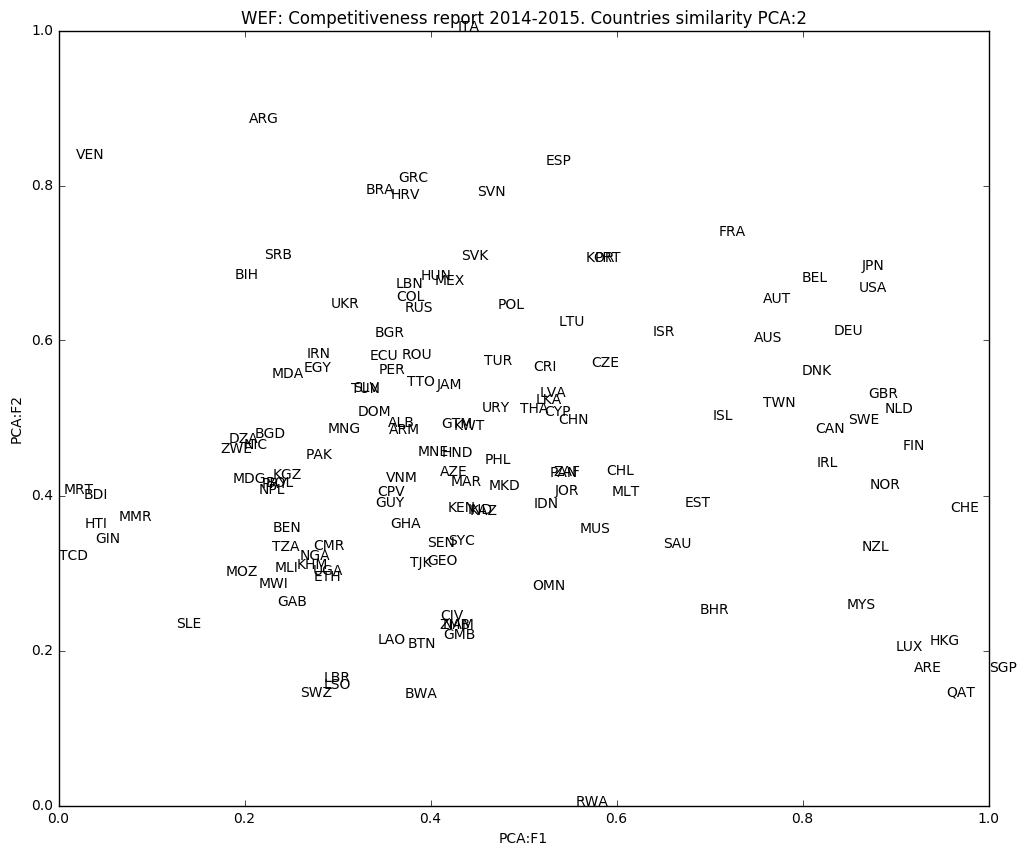

In [164]:
dfp=(dfp2-dfp2.min())/(dfp2.max()-dfp2.min()) #normalize to a range 0:1 to see the plot properly
fig = plt.figure(figsize=(12,10))
countries=dfp2.index.values.tolist()
for i, txt in enumerate(countries):
    plt.text(dfp.iloc[i,0],dfp.iloc[i,1],txt)
plt.title("WEF: Competitiveness report 2014-2015. Countries similarity PCA:2")
plt.xlabel("PCA:F1")
plt.ylabel("PCA:F2")
plt.show()